In [17]:
import findspark
findspark.init()

import pyspark
# sc = pyspark.SparkContext()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.types import *
from datetime import datetime

# counterpoint_data = sc.textFile('../DataMining/Export.csv')
# print(counterpoint_data.collect())


In [8]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load('Export.csv')
df.registerTempTable('tempTable')
df.printSchema()

root
 |-- Gemeente: string (nullable = true)
 |-- Type fietspad: string (nullable = true)
 |-- Oorsprong: string (nullable = true)
 |-- Bestemming: string (nullable = true)
 |-- Richting: string (nullable = true)
 |-- Type dag: string (nullable = true)
 |-- Uur: string (nullable = true)
 |-- Jaar: string (nullable = true)
 |-- Gemiddeld aantal fietsers: string (nullable = true)
 |-- Code fietstelpunt: string (nullable = true)



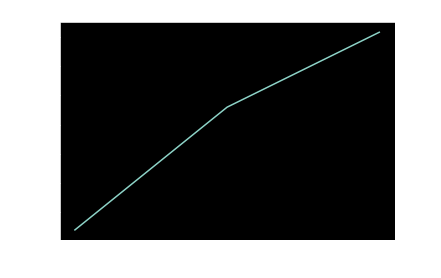

In [7]:
totalPerYear = []

for i in range(3):
    Year = 2015 + i
    statement = "SELECT SUM(`Gemiddeld aantal fietsers`) from tempTable where Jaar =" + str(Year) + " And `Code fietstelpunt` IN ('MERCA', 'AFP13', 'ERNVD')"
    bikeData = sqlContext.sql(statement).collect()
    totalPerYear.append(bikeData[0][0])

%matplotlib inline
import matplotlib.pyplot as plt

years = ["2015", "2016", "2017"]
data = totalPerYear

plt.ylabel("Aantal Fietsers")
plt.xlabel("Jaar")
plt.title("Aantal fietsers per jaar voor fietstelpunten MERCA, AFP13 en ERNVD")
plt.plot(years, data)
plt.show()

[5972.0, 4873.0, 1701.0, 12694.0, 2182.0, 58068.0, 2673.0, 13494.0, 4896.0, 7088.0, 1579.0, 926.0, 10691.0, 1992.0, 5557.0, 2379.0, 347.0, 7176.0, 7795.0, 3055.0, 24823.0, 2588.0, 12286.0, 1254.0, 8106.0, 1348.0, 401.0, 1335.0, 7460.0, 6480.0, 5846.0, 39056.0, 4920.0, 2047.0, 1786.0, 14069.0, 8208.0, 4089.0, 2463.0, 10696.0, 5099.0, 12753.0, 4526.0]


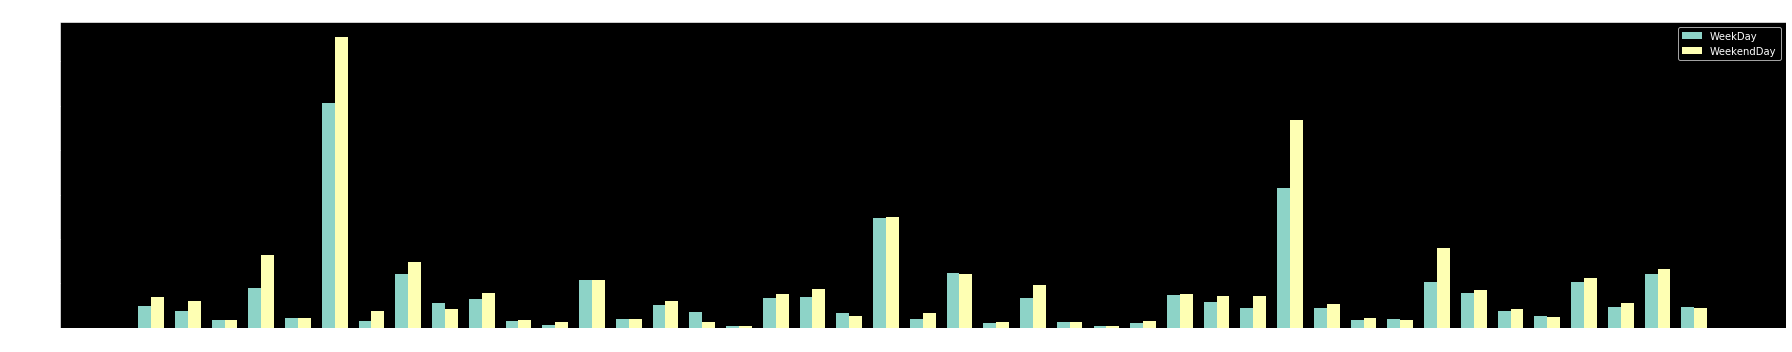

In [25]:
statement = "SELECT Distinct `Code fietstelpunt` from tempTable"
dataPointTemp = sqlContext.sql(statement).collect()

dataPoint = []
weekDaySum = []
weekendSum = []
totalSum = []

for i in range(len(dataPointTemp) - 1):
    dataPoint.append(dataPointTemp[i][0])
    weekDaySumTemp = sqlContext.sql("Select SUM(`Gemiddeld aantal fietsers`) from tempTable where `Type dag` = 'werkdag' and `Code fietstelpunt` = '" + dataPointTemp[i][0] + "'").collect()
    weekDaySum.append(weekDaySumTemp[0][0])
    weekendSumTemp = sqlContext.sql("Select SUM(`Gemiddeld aantal fietsers`) from tempTable where `Type dag` IN ('zaterdag', 'zondag') and `Code fietstelpunt` = '" + dataPointTemp[i][0] + "'").collect()
    weekendSum.append(weekendSumTemp[0][0])

import numpy as np

labels = dataPoint
week = weekDaySum
weekend = weekendSum

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,5))
rects1 = ax.bar(x - width/2, week, width, label='WeekDay')
rects2 = ax.bar(x + width/2, weekend, width, label='WeekendDay')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sum of AVG')
ax.set_title('Avg fietser per weekdag/weekenddag')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.align_labels()
fig.tight_layout()

plt.show()

In [61]:
import folium
from folium.plugins import MarkerCluster

A_COOR = (51.2171918, 4.4212529)
mc = MarkerCluster()

df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', delimiter=";").load('Locations.csv')
df.registerTempTable("locationTable")

statement = "SELECT * FROM locationTable"
locations = sqlContext.sql(statement).collect()

totalSum = []

for i in range(len(dataPointTemp) - 1):
    totalAverage = "SELECT `Code fietstelpunt`, SUM(`Gemiddeld aantal fietsers`) FROM tempTable WHERE `Code fietstelpunt` = '" + dataPointTemp[i][0] + "' GROUP BY `Code fietstelpunt`" 
    # totalAverage = "SELECT SUM(`Gemiddeld aantal fietsers`) FROM tempTable WHERE `Code fietstelpunt` = '" + dataPointTemp[i][0] + "'"
    totalSumTemp = sqlContext.sql(totalAverage).collect()

    totalSum.append({totalSumTemp[0][0], totalSumTemp[0][1]})

print(totalSum)

# def setColorForMarker(coor)
    

map = folium.Map(location=A_COOR, zoom_start=13)
for coor in locations:
    code = coor[0]
    lat = coor[1]
    longi = coor[2]
    # color = setColorForMarker(lat, longi)
    mc.add_child(
    folium.Marker(
        # icon = folium.Icon(color=color)
        [lat, longi],
        popup = code
    )).add_to(map)

display(map)

[{5972.0, 'ANT12'}, {4873.0, 'AFP06'}, {1701.0, 'ANTB5'}, {'ANT10', 12694.0}, {'ANTS2', 2182.0}, {'MERCA', 58068.0}, {2673.0, 'ANTR2'}, {'AFP02', 13494.0}, {4896.0, 'ANTB1'}, {7088.0, 'ANT07'}, {1579.0, 'ANTR6'}, {926.0, 'ANTS6'}, {10691.0, 'AFP07'}, {1992.0, 'ANTB3'}, {5557.0, 'ANTR3'}, {2379.0, 'PAM01'}, {347.0, 'HAV03'}, {7176.0, 'AFP04'}, {7795.0, 'AFP01'}, {'ANTB2', 3055.0}, {'AFP08', 24823.0}, {2588.0, 'ANTS5'}, {12286.0, 'ANT11'}, {1254.0, 'ANTB4'}, {8106.0, 'ANT08'}, {1348.0, 'HAV01'}, {'HAV02', 401.0}, {'ANTR1', 1335.0}, {'ANT06', 7460.0}, {6480.0, 'AFP05'}, {'ANT03', 5846.0}, {39056.0, 'ERNVD'}, {'ANTR5', 4920.0}, {'ANTS4', 2047.0}, {1786.0, 'ANTS3'}, {'ANT09', 14069.0}, {8208.0, 'AFP03'}, {4089.0, 'ANT04'}, {2463.0, 'EKE20'}, {10696.0, 'ANT01'}, {'ANTR4', 5099.0}, {12753.0, 'ANT05'}, {4526.0, 'ANT02'}]
